In [2]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=c28a37c8e1111427965e9a58597bdeb63055a51544727465e01e7fe10eb9476b
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [4]:
import requests
import feedparser
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

# Function to scrape CNBC headlines
def scrape_cnbc_headlines():
    cnbc_url = "https://www.cnbc.com/search/?query=green%20hydrogen&qsearchterm=green%20hydrogen"
    response = requests.get(cnbc_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    headlines_cnbc = [headline.text.strip() for headline in soup.select('your_css_selector_for_headlines')]
    dates_cnbc = [datetime.strptime(date.text.strip(), "%b %d, %Y") for date in soup.select('your_css_selector_for_dates')]

    df_cnbc = pd.DataFrame({'Headline': headlines_cnbc, 'Date': dates_cnbc})
    return df_cnbc

# Function to parse Google News RSS feed
def parse_google_news_rss():
    google_news_url = "https://news.google.com/rss/search?q=green%20hydrogen&hl=en-IN&gl=IN&ceid=IN:en"
    feed = feedparser.parse(google_news_url)

    headlines_google_news = [entry.title for entry in feed.entries]
    dates_google_news = [datetime.strptime(entry.published, "%a, %d %b %Y %H:%M:%S %Z") for entry in feed.entries]

    df_google_news = pd.DataFrame({'Headline': headlines_google_news, 'Date': dates_google_news})
    return df_google_news

# Combine the dataframes
df_cnbc = scrape_cnbc_headlines()
df_google_news = parse_google_news_rss()
df_combined = pd.concat([df_cnbc, df_google_news], ignore_index=True)

# Display the combined dataframe
print("Combined DataFrame:")
print(df_combined)

Combined DataFrame:
                                             Headline                Date
0   NTPC Green Energy inks MoU with Maharashtra Go... 2024-01-30 08:10:07
1   Hygenco to invest $2.5 bn over 3 years to set ... 2024-01-31 12:22:06
2   Rooftop solar, green hydrogen, offshore wind, ... 2024-01-31 19:31:44
3   Indian renewables giant proposes 2GW green hyd... 2024-01-29 12:26:00
4   ReNew proposes to invest Rs 26,400 crore for g... 2024-01-29 01:43:42
..                                                ...                 ...
94  Welspun plans to invest Rs 40,000 cr in Gujara... 2024-01-10 08:00:00
95  Budget 2024: Navigating India's hydrogen chall... 2024-01-24 06:41:43
96  Gujarat-The Green Hydrogen Destination of Indi... 2024-01-12 08:00:00
97  Greenko, ACME, Reliance Among Winners of SECI'... 2024-01-02 08:00:00
98  Fortescue & Nikola Insane Green Hydrogen For T... 2024-01-31 17:04:48

[99 rows x 2 columns]


In [5]:
df_combined

,Headline,Date
0,NTPC Green Energy inks MoU with Maharashtra Go...,2024-01-30 08:10:07
1,Hygenco to invest $2.5 bn over 3 years to set ...,2024-01-31 12:22:06
2,"Rooftop solar, green hydrogen, offshore wind, ...",2024-01-31 19:31:44
3,Indian renewables giant proposes 2GW green hyd...,2024-01-29 12:26:00
4,"ReNew proposes to invest Rs 26,400 crore for g...",2024-01-29 01:43:42
...,...,...
94,"Welspun plans to invest Rs 40,000 cr in Gujara...",2024-01-10 08:00:00
95,Budget 2024: Navigating India's hydrogen chall...,2024-01-24 06:41:43
96,Gujarat-The Green Hydrogen Destination of Indi...,2024-01-12 08:00:00
97,"Greenko, ACME, Reliance Among Winners of SECI'...",2024-01-02 08:00:00


###   Sentiment Analysis using Hugging Face Model

In [6]:
from transformers import pipeline

# Load sentiment analysis model from Hugging Face
sentiment_analysis = pipeline("sentiment-analysis")

# Apply sentiment analysis to the headlines
df_combined['Sentiment Score'] = df_combined['Headline'].apply(lambda x: sentiment_analysis(x)[0]['score'])

# Display the dataframe with sentiment scores
print("DataFrame with Sentiment Scores:")
print(df_combined)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

DataFrame with Sentiment Scores:
                                             Headline                Date  \
0   NTPC Green Energy inks MoU with Maharashtra Go... 2024-01-30 08:10:07   
1   Hygenco to invest $2.5 bn over 3 years to set ... 2024-01-31 12:22:06   
2   Rooftop solar, green hydrogen, offshore wind, ... 2024-01-31 19:31:44   
3   Indian renewables giant proposes 2GW green hyd... 2024-01-29 12:26:00   
4   ReNew proposes to invest Rs 26,400 crore for g... 2024-01-29 01:43:42   
..                                                ...                 ...   
94  Welspun plans to invest Rs 40,000 cr in Gujara... 2024-01-10 08:00:00   
95  Budget 2024: Navigating India's hydrogen chall... 2024-01-24 06:41:43   
96  Gujarat-The Green Hydrogen Destination of Indi... 2024-01-12 08:00:00   
97  Greenko, ACME, Reliance Among Winners of SECI'... 2024-01-02 08:00:00   
98  Fortescue & Nikola Insane Green Hydrogen For T... 2024-01-31 17:04:48   

    Sentiment Score  
0          0.758634 

In [7]:
### Checking the dataframe with sentiment score
df_combined

,Headline,Date,Sentiment Score
0,NTPC Green Energy inks MoU with Maharashtra Go...,2024-01-30 08:10:07,0.758634
1,Hygenco to invest $2.5 bn over 3 years to set ...,2024-01-31 12:22:06,0.783476
2,"Rooftop solar, green hydrogen, offshore wind, ...",2024-01-31 19:31:44,0.960042
3,Indian renewables giant proposes 2GW green hyd...,2024-01-29 12:26:00,0.993458
4,"ReNew proposes to invest Rs 26,400 crore for g...",2024-01-29 01:43:42,0.733632
...,...,...,...
94,"Welspun plans to invest Rs 40,000 cr in Gujara...",2024-01-10 08:00:00,0.966196
95,Budget 2024: Navigating India's hydrogen chall...,2024-01-24 06:41:43,0.994061
96,Gujarat-The Green Hydrogen Destination of Indi...,2024-01-12 08:00:00,0.972710
97,"Greenko, ACME, Reliance Among Winners of SECI'...",2024-01-02 08:00:00,0.977329


###  Named Entity Recognition (NER) for Organization Names

In [8]:
import pandas as pd

# Extract organization names after the "-"
def extract_organization_names(text):
    parts = text.split("-")
    if len(parts) > 1:
        return parts[1].strip()
    else:
        return None

# Apply extraction to the headlines
df_combined['Organization Names'] = df_combined['Headline'].apply(extract_organization_names)

# Display the dataframe with organization names
pd.set_option('display.max_colwidth', None)
print("DataFrame with Organization Names:")
print(df_combined[['Headline', 'Organization Names']])

DataFrame with Organization Names:
                                                                                                                     Headline  \
0            NTPC Green Energy inks MoU with Maharashtra Govt for green hydrogen projects Worth ₹80,000 crore - ETEnergyWorld   
1                           Hygenco to invest $2.5 bn over 3 years to set up Green Hydrogen projects in India - ETEnergyWorld   
2   Rooftop solar, green hydrogen, offshore wind, green energy corridor may find mention in FM's Budget speech - Moneycontrol   
3                  Indian renewables giant proposes 2GW green hydrogen and ammonia plant in Kerala: report - Hydrogen Insight   
4                               ReNew proposes to invest Rs 26,400 crore for green hydrogen project in Kerala - ETEnergyWorld   
..                                                                                                                        ...   
94                            Welspun plans to invest Rs 40,00

In [9]:
### CHecking the dataframe with Organization names
df_combined

,Headline,Date,Sentiment Score,Organization Names
0,"NTPC Green Energy inks MoU with Maharashtra Govt for green hydrogen projects Worth ₹80,000 crore - ETEnergyWorld",2024-01-30 08:10:07,0.758634,ETEnergyWorld
1,Hygenco to invest $2.5 bn over 3 years to set up Green Hydrogen projects in India - ETEnergyWorld,2024-01-31 12:22:06,0.783476,ETEnergyWorld
2,"Rooftop solar, green hydrogen, offshore wind, green energy corridor may find mention in FM's Budget speech - Moneycontrol",2024-01-31 19:31:44,0.960042,Moneycontrol
3,Indian renewables giant proposes 2GW green hydrogen and ammonia plant in Kerala: report - Hydrogen Insight,2024-01-29 12:26:00,0.993458,Hydrogen Insight
4,"ReNew proposes to invest Rs 26,400 crore for green hydrogen project in Kerala - ETEnergyWorld",2024-01-29 01:43:42,0.733632,ETEnergyWorld
...,...,...,...,...
94,"Welspun plans to invest Rs 40,000 cr in Gujarat for green hydrogen, ammonia - Business Standard",2024-01-10 08:00:00,0.966196,Business Standard
95,Budget 2024: Navigating India's hydrogen challenge for Sustainable Energy Future - ETEnergyWorld,2024-01-24 06:41:43,0.994061,ETEnergyWorld
96,"Gujarat-The Green Hydrogen Destination of India seminar, 3rd day VGGS - CMO Gujarat",2024-01-12 08:00:00,0.972710,"The Green Hydrogen Destination of India seminar, 3rd day VGGS"
97,"Greenko, ACME, Reliance Among Winners of SECI's Green Hydrogen Manufacturing Auction - Mercom India",2024-01-02 08:00:00,0.977329,Mercom India


###  Weekwise Trend of Average Sentiment Score

<ipython-input-13-33fbbb5005aa>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_trend = df_combined.resample('W-Mon', on='Date').mean()


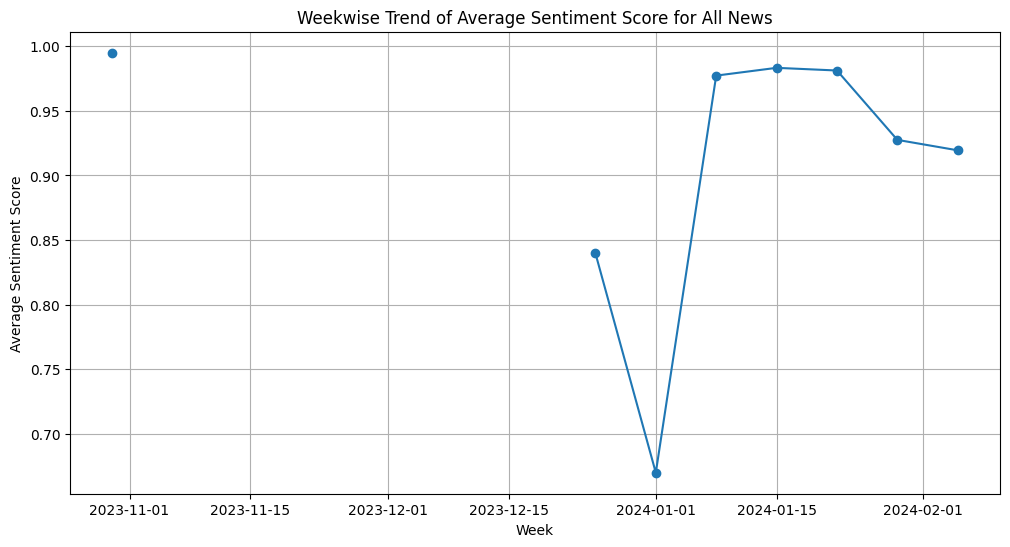

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined is your DataFrame
df_combined['Date'] = pd.to_datetime(df_combined['Date'])

# Group by week and calculate the average sentiment score
df_weekly_trend = df_combined.resample('W-Mon', on='Date').mean()

# Plotting the weekwise trend of average sentiment score for all news
plt.figure(figsize=(12, 6))
plt.plot(df_weekly_trend.index, df_weekly_trend['Sentiment Score'], marker='o', linestyle='-')
plt.title('Weekwise Trend of Average Sentiment Score for All News')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

###  Wordcloud with Organization Names

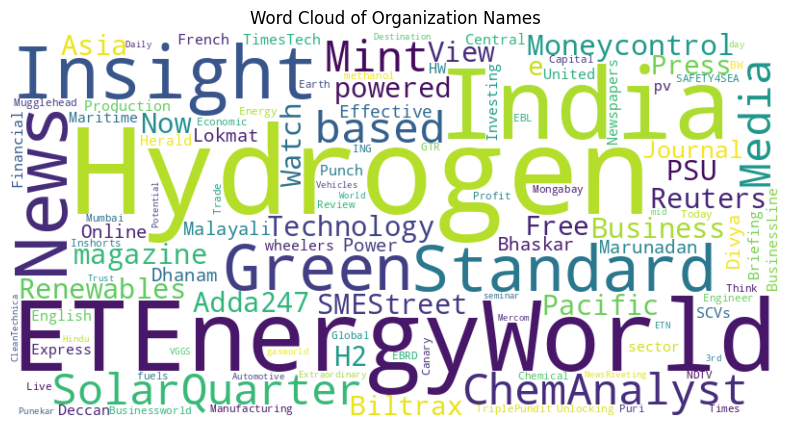

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine organization names into a single string
all_organization_names = ' '.join(df_combined['Organization Names'].dropna())

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_organization_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Organization Names')
plt.show()

###  Downloading the csv file

In [14]:
df_combined.to_csv('df_combined.csv', index=False)